<a href="https://colab.research.google.com/github/leandrobarbieri/python-datascience-ml/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
# dados no espaço vetorial e classificados de forma que as categorias fiquem a maior distancia possivel entre eles
# cria uma função qe separa
# kernel trick para dados não linearmente separaveis

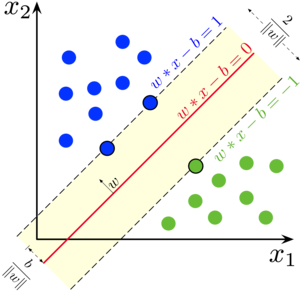

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [40]:
# importa um dataset de dados de cancer de pulmão
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

# dicionario
cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

In [41]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [42]:
#cancer["data"]
#cancer["target"]
#cancer["target_names"]
cancer["feature_names"]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [43]:
# Features X
df_cancer = pd.DataFrame(cancer["data"], columns=cancer["feature_names"])

In [44]:
df_cancer.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [45]:
# Target Y
df_target = pd.DataFrame(cancer["target"], columns=["Cancer"])
df_target

,Cancer
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(df_cancer, np.ravel(df_target), test_size=0.30, random_state=101)
model = SVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 56  10]
 [  3 102]]
              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



# Gridsearch
Encontrar os parâmetros certos (como o que o C ou os valores de gama para usar) é uma tarefa complicada! Mas, felizmente, podemos ser um pouco preguiçosos e apenas tentar um monte de combinações e ver o que funciona melhor! Essa idéia de criar uma "grade" de parâmetros e apenas experimentar todas as combinações possíveis é chamada Gridsearch, esse método é comum o suficiente para que o Scikit-learn tenha essa funcionalidade incorporada no GridSearchCV!

O GridSearchCV usa um dicionário que descreve os parâmetros que devem ser testados e um modelo para treinar. A grade de parâmetros é definida como um dicionário, onde as chaves são os parâmetros e os valores são as configurações a serem testadas.

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

Uma das grandes coisas do GridSearchCV é que é um meta-estimador. Ele pega um estimador como SVC e cria um novo estimador, que se comporta exatamente da mesma forma - neste caso, como um classificador. Você deve adicionar refit=True e escolher detalhadamente para número desejado, maior o número, mais detalhado.

Você deve adicionar refit=True e escolher um número para o parâmetro verbose. Quanto maior o número, mais detalhamento teremos.

In [48]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

O que o fit faz é um pouco mais complicado do que o habital. Primeiro, ele executa o mesmo loop com validação cruzada, para encontrar a melhor combinação de parâmetros. Uma vez que tenha a melhor combinação, ele corre novamente em todos os dados para fitá-los (sem validação cruzada), para construir um único modelo novo usando a melhor configuração de parâmetro.

In [49]:
# Talvez demore um pouco
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [50]:
# Você pode inspecionar os melhores parâmetros encontrados pelo GridSearchCV no atributo best_params_ e o melhor estimador no melhor atributo \ _estimator_:
grid.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [51]:
grid.best_estimator_

SVC(C=1, gamma=0.0001)

In [52]:
grid_predictions = grid.predict(X_test)

print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[ 59   7]
 [  4 101]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        66
           1       0.94      0.96      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

